In [4]:
import triangle as tri 
import numpy as np
import matplotlib.pyplot as plt
import pypoman 
import fractions as fr

def array_index(T, a):
    for i, arr in enumerate(T):
        if np.array_equal(arr, a):
            return i
    raise ValueError(f'{a} is not in list')


def triag_listo(T,v):
    a = v[0]
    b = v[1]
    c = v[2]
    
    aa = array_index(T,a)
    bb = array_index(T,b)
    cc = array_index(T,c)
    seg = [[aa,bb],[bb,cc],[cc,aa]]

    x = (a+b+c)/3
    return seg, x   



In [9]:
np.ones(1)[0]

1.0

In [3]:
a = np.array([1,2,3])

a[1] = 4

print(a)

[1 4 3]


In [3]:
np.delete(np.zeros([3]),0,0)

array([0., 0.])

In [19]:
[1,2,3,4][-3:]

[2, 3, 4]

In [13]:
np.vectorize(float)(fr.Fraction(123213213123543123213,12312321242143214321312))

array(0.01000731)

In [15]:
print(np.vectorize(float)(np.array([fr.Fraction(1,2), fr.Fraction(2,3)])))

[0.5        0.66666667]


In [12]:
a = np.array([1,1,0])
b = np.array([2,1,0])
c = np.array([2,2,0])

In [14]:

A,b = pypoman.duality.compute_polytope_halfspaces([a,b,c])

In [15]:
A

array([[ 1., -0., -0.],
       [-1.,  1., -0.],
       [-0., -1., -0.],
       [-0., -0., -1.]])

In [16]:
b

array([ 2.,  0., -1.,  0.])

In [4]:

a = np.array([0,0])
b = np.array([-1,-1])
c = np.array([0,-2])
d = np.array([1,-2])
e = np.array([2,-1])
f = np.array([1,0])

g = np.array([-0.25,-0.5])
h = np.array([1,-0.5])
i = np.array([0.75,-0.25])

tria = dict()


vertices = [a,b,c,d,e,f,g,h,i]
segments = []
holes = []

Limpios = [[g,h,i]]

for v in Limpios:
    seg, x = triag_listo(vertices, v)

    for s in seg:
        segments.append(s)
    holes.append(x)


tria["vertices"] = vertices
tria["segments"] = segments
tria["holes"] = holes

t = tri.triangulate(tria, opts="pc")

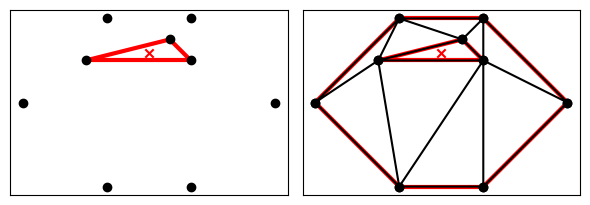

In [5]:
tri.compare(plt, tria, t)
plt.show()

In [6]:
t


{'vertices': array([[ 0.  ,  0.  ],
        [-1.  , -1.  ],
        [ 0.  , -2.  ],
        [ 1.  , -2.  ],
        [ 2.  , -1.  ],
        [ 1.  ,  0.  ],
        [-0.25, -0.5 ],
        [ 1.  , -0.5 ],
        [ 0.75, -0.25]]),
 'vertex_markers': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=int32),
 'triangles': array([[1, 2, 6],
        [6, 0, 1],
        [8, 0, 6],
        [6, 2, 7],
        [3, 4, 7],
        [8, 7, 5],
        [5, 7, 4],
        [8, 5, 0],
        [7, 2, 3]], dtype=int32),
 'segments': array([[7, 6],
        [8, 7],
        [8, 6],
        [2, 1],
        [3, 2],
        [4, 3],
        [5, 4],
        [0, 5],
        [1, 0]], dtype=int32),
 'segment_markers': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=int32),
 'holes': array([[ 0.5       , -0.41666667]])}

In [7]:
t["holes"] = np.append(t["holes"], np.array([[0,-0.25]]), axis=0)

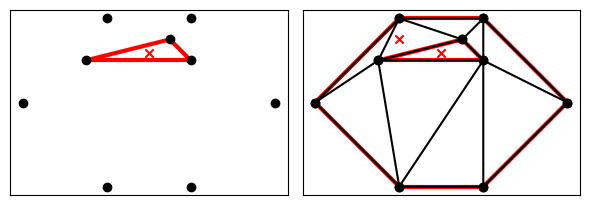

In [8]:
tri.compare(plt, tria, t)
plt.show()

In [9]:
t["segment_markers"] = np.array([
    [1],
    [1],
    [1],
    [0],
    [0],
    [0]
])

In [10]:
t = tri.triangulate(t, "pc")

In [11]:
del t["holes"]